# Proyecto: Estrategia de Retención de Clientes en Model Fitness

# Introducción

La pérdida de clientes, también conocida como "churn", es un desafío común para gimnasios y otros servicios de suscripción. En el caso de los gimnasios, detectar a tiempo qué clientes están en riesgo de cancelar su membresía puede ayudar a implementar estrategias de retención eficaces y mejorar la experiencia del cliente.

Model Fitness, una cadena de gimnasios, ha digitalizado los perfiles de sus clientes y ha recopilado datos de uso para desarrollar una estrategia de retención basada en análisis de datos. La empresa ha identificado que un cliente puede considerarse como "perdido" si no asiste al gimnasio durante un mes completo. Sin embargo, también es importante entender los factores subyacentes que influyen en la pérdida de clientes para poder intervenir proactivamente.

# Objetivos del Proyecto

1. **Predecir la probabilidad de pérdida**: Desarrollar un modelo para anticipar la cancelación de membresías (churn) para el próximo mes.
2. **Definir perfiles de usuario típicos**: Identificar y describir grupos de clientes con características y comportamientos específicos.
3. **Analizar factores de pérdida**: Evaluar qué variables tienen un mayor impacto en la pérdida de clientes.
4. **Recomendaciones de retención**: Proponer estrategias de retención específicas para grupos de clientes en riesgo.

# Descripción de los Datos

El conjunto de datos proporcionado contiene la siguiente información:
- **Datos demográficos y de registro de usuario**: como género, edad, si vive cerca del gimnasio, si obtuvo una membresía con descuento a través de una empresa asociada o de una promoción "trae a un amigo".
- **Datos de uso y compras**: como el periodo de contrato, meses restantes en el contrato, frecuencia de visitas y gastos adicionales en el gimnasio.
- **Variable objetivo**: `Churn`, que indica si el cliente canceló su membresía en el mes en cuestión.

# Pasos del Proyecto

1. **Análisis exploratorio de datos (EDA)**: Analizar las características de los clientes y observar patrones de pérdida.
2. **Construcción de un modelo de predicción**: Crear modelos de clasificación para predecir la cancelación de membresías.
3. **Segmentación de clientes**: Utilizar técnicas de clustering para identificar y describir diferentes grupos de clientes.
4. **Conclusiones y recomendaciones**: Desarrollar estrategias de retención basadas en los hallazgos obtenidos.

Este análisis proporcionará a Model Fitness una visión profunda sobre los patrones de uso y las características de los clientes, permitiendo diseñar estrategias de interacción y retención de clientes efectivas.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Cargar el archivo CSV
file_path = '/datasets/gym_churn_us.csv'  
data = pd.read_csv(file_path)

In [4]:
# Cargar el archivo CSV
file_path = '/datasets/gym_churn_us.csv'  
data = pd.read_csv(file_path)# Ver las primeras filas del dataset
data.head()

# Verificar el tipo de datos y la presencia de valores nulos
data.info()

# Descripción estadística de las columnas numéricas
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
# Comprobamos si hay valores nulos en las columnas
missing_data = data.isnull().sum()
missing_data[missing_data > 0]  


Series([], dtype: int64)

In [6]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Columnas categóricas: ", categorical_columns)

Columnas categóricas:  Index([], dtype='object')


In [7]:
# Mostrar las columnas del dataset para revisar su estructura
data.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

## Análisis exploratorio de datos (EDA)

### Análisis de los valores medios de las características según el grupo objetivo (Churn)

In [8]:
# Agrupar por la variable objetivo 'Churn' y calcular la media para cada grupo
churn_grouped = data.groupby('Churn').mean()

# Mostrar las estadísticas descriptivas para los grupos Churn = 0 y Churn = 1
print(churn_grouped)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

#### Factores Clave:
- **Contratos más cortos**: Los clientes que cancelan su membresía tienden a tener contratos más cortos, con un promedio de 1.7 meses frente a 5.7 meses para aquellos que no cancelan.
- **Edad**: La edad promedio de los clientes que se van es de alrededor de 27 años, mientras que aquellos que permanecen tienen una edad promedio de 30 años.
- **Frecuencia de visitas**: Los clientes que cancelan muestran una menor frecuencia de visitas, tanto en el total histórico como en el mes actual. La frecuencia promedio de visitas en el mes actual es de 1.04 veces frente a 2.03 veces para quienes continúan.

#### Factores de Influencia:
- **Ubicación cercana al gimnasio**: Vivir cerca del gimnasio parece ser un factor protector, ya que los clientes que viven cerca tienen una tasa de retención más alta (84.5% permanecen).
- **Promociones "Trae a un amigo"**: Los usuarios que obtienen su membresía a través de promociones "trae a un amigo" o mediante empresas asociadas tienen una tasa de cancelación más baja.

### Visualización de la distribución de las características

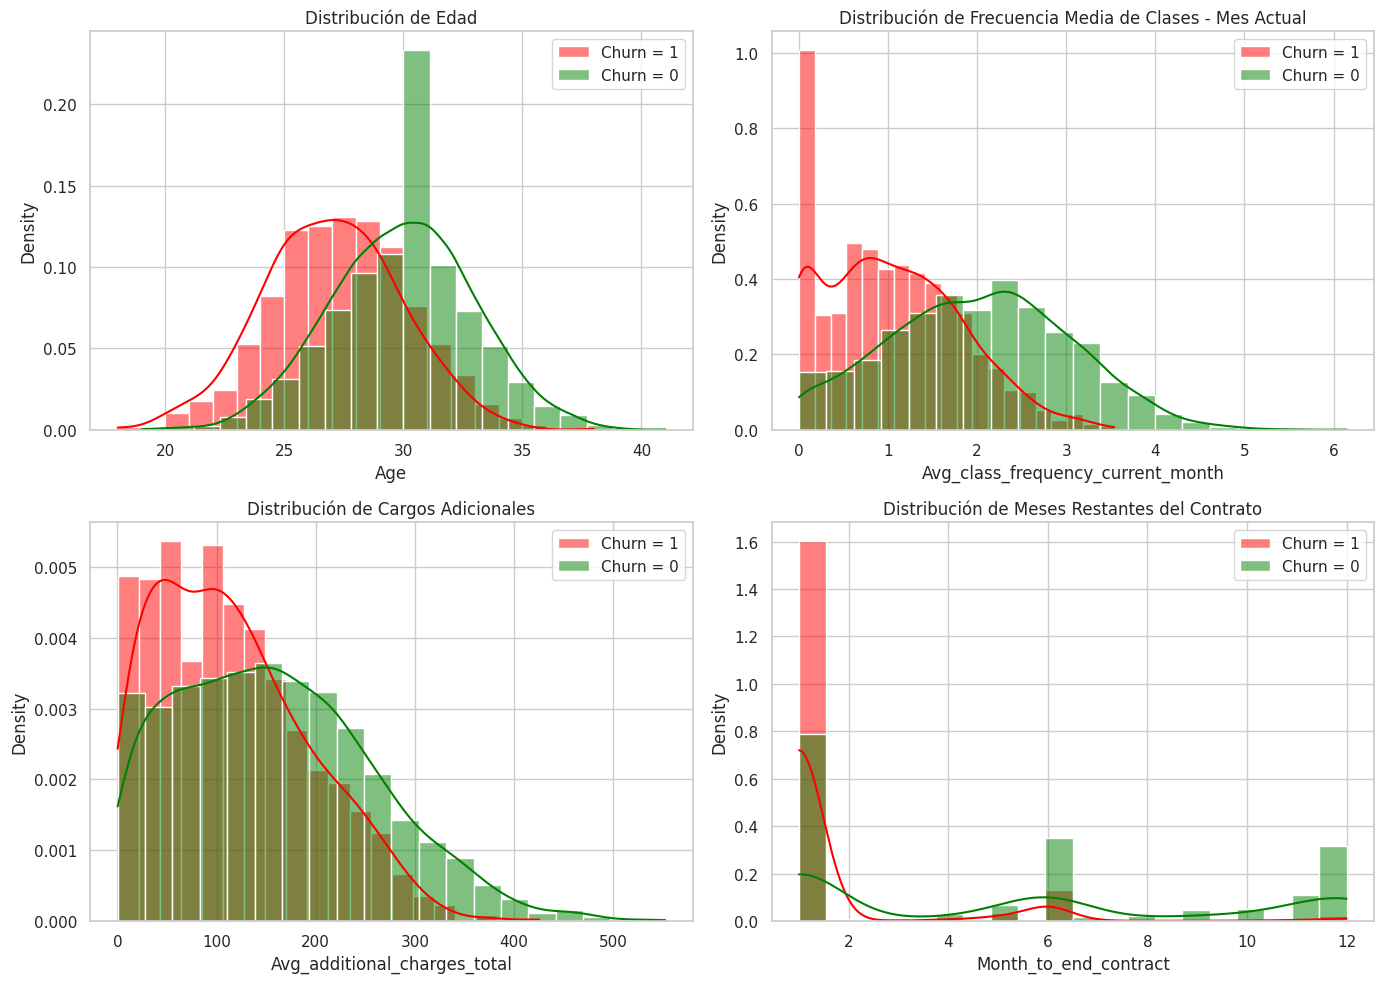

In [11]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Gráficos de distribución por Churn (0: no se fue, 1: se fue)
# Graficamos algunas variables de interés: 'Age', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total'

# Histogramas para usuarios que se fueron y los que no
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de Edad
sns.histplot(data[data['Churn'] == 1]['Age'], kde=True, color='red', ax=axes[0, 0], label='Churn = 1', stat='density', bins=20)
sns.histplot(data[data['Churn'] == 0]['Age'], kde=True, color='green', ax=axes[0, 0], label='Churn = 0', stat='density', bins=20)
axes[0, 0].set_title('Distribución de Edad')
axes[0, 0].legend()

# Gráfico de Frecuencia media de clases actuales
sns.histplot(data[data['Churn'] == 1]['Avg_class_frequency_current_month'], kde=True, color='red', ax=axes[0, 1], label='Churn = 1', stat='density', bins=20)
sns.histplot(data[data['Churn'] == 0]['Avg_class_frequency_current_month'], kde=True, color='green', ax=axes[0, 1], label='Churn = 0', stat='density', bins=20)
axes[0, 1].set_title('Distribución de Frecuencia Media de Clases - Mes Actual')
axes[0, 1].legend()

# Gráfico de Cargos adicionales
sns.histplot(data[data['Churn'] == 1]['Avg_additional_charges_total'], kde=True, color='red', ax=axes[1, 0], label='Churn = 1', stat='density', bins=20)
sns.histplot(data[data['Churn'] == 0]['Avg_additional_charges_total'], kde=True, color='green', ax=axes[1, 0], label='Churn = 0', stat='density', bins=20)
axes[1, 0].set_title('Distribución de Cargos Adicionales')
axes[1, 0].legend()

# Gráfico de Tiempo restante del contrato
sns.histplot(data[data['Churn'] == 1]['Month_to_end_contract'], kde=True, color='red', ax=axes[1, 1], label='Churn = 1', stat='density', bins=20)
sns.histplot(data[data['Churn'] == 0]['Month_to_end_contract'], kde=True, color='green', ax=axes[1, 1], label='Churn = 0', stat='density', bins=20)
axes[1, 1].set_title('Distribución de Meses Restantes del Contrato')
axes[1, 1].legend()

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


#### Frecuencia de Clases:
- Una baja frecuencia de uso en el mes actual es un predictor fuerte de cancelación. Esto sugiere que los clientes que no están utilizando el servicio frecuentemente tienen más probabilidades de cancelar.

#### Cargos Adicionales:
- Los clientes que cancelan suelen gastar menos en servicios adicionales. El promedio de gastos adicionales para quienes cancelan es de $115, frente a $158 para quienes permanecen.

#### Tiempo Restante del Contrato:
- Los clientes con menos meses restantes en su contrato tienden a cancelar más. Esto sugiere que retener a los clientes antes de que se acerque el final de su contrato puede ser una estrategia efectiva para reducir la cancelación.

### Matriz de correlación

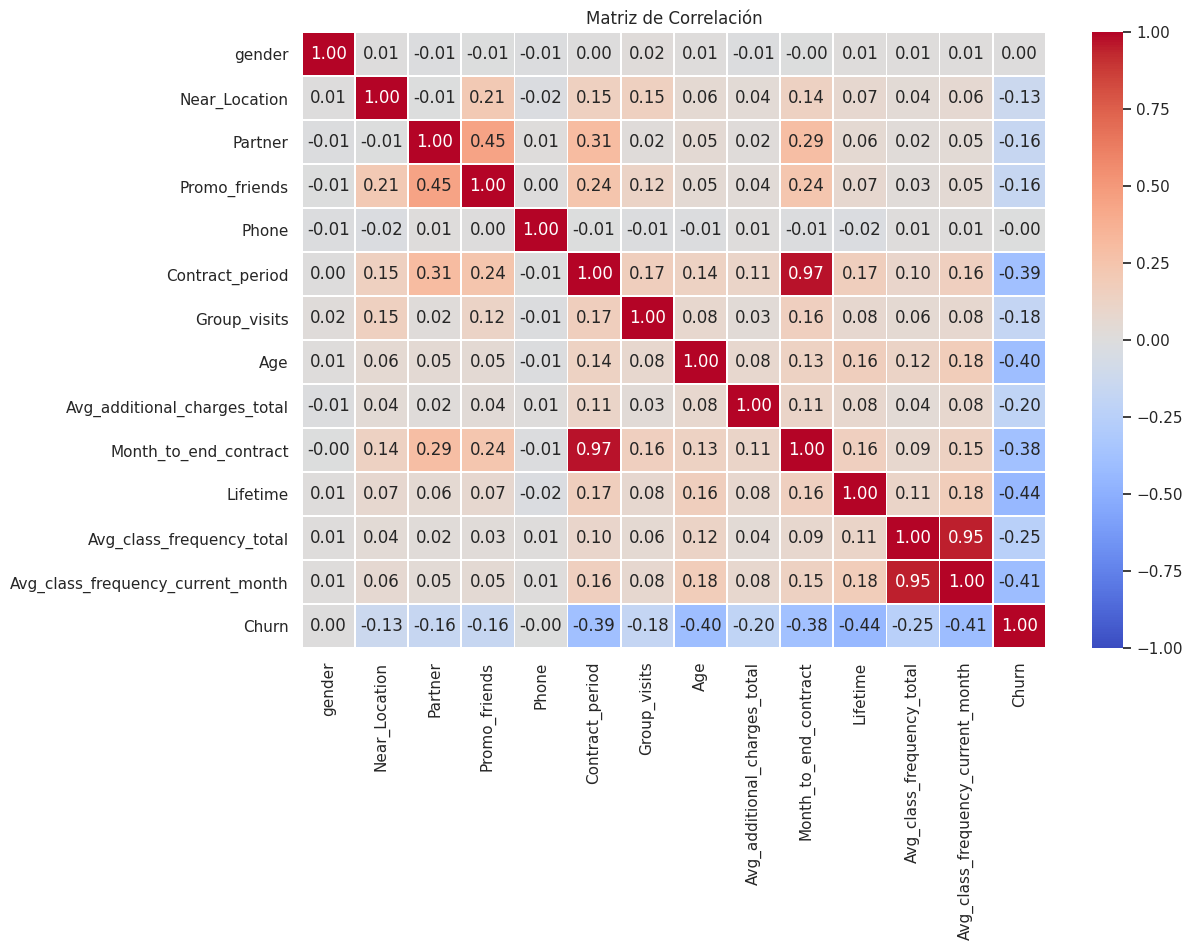

In [12]:
correlation_matrix = data.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

#### Variables con mayor correlación negativa con el churn:
- **Frecuencia media de clases (actual y total)**: Cuanto más frecuentemente un cliente asista al gimnasio, menor es la probabilidad de que cancele.
- **Meses restantes en el contrato**: Un mayor número de meses restantes en el contrato está asociado con una menor probabilidad de cancelación.

#### Variables con correlación positiva:
- **Promociones "Trae a un amigo"**: Muestra una leve correlación positiva, indicando que esta estrategia puede tener un impacto positivo en la retención.

###  Conclusiones y Recomendaciones

#### Segmentación para Intervención Proactiva:
- Los clientes **jóvenes** con contratos **cortos** y baja frecuencia de uso deben ser el foco de campañas de retención.
- **Incentivos para aumentar la frecuencia de visitas**, como desafíos de asistencia o recompensas por alcanzar metas mensuales, pueden ser efectivos.

#### Extensión de Contratos:
- Promover la **renovación antes del último mes** mediante descuentos o beneficios adicionales puede reducir la tasa de cancelación (churn).

#### Estrategias de Retención:
- Mejorar la **experiencia de los clientes que viven lejos del gimnasio**, por ejemplo, mediante contenido en línea o descuentos especiales.
- **Potenciar las promociones "trae a un amigo"**, ya que muestran un impacto positivo en la retención de clientes.


## Construcción de un modelo de predicción

### Preparar datos

In [16]:
# Dividir en variables predictoras (X) y variable objetivo (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

### División de datos

In [18]:
# Dividir en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Escalar los Datos

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustar el escalador con el conjunto de entrenamiento y transformar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Modelo de Regresión Logística

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear y ajustar el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluar el modelo
print("Exactitud del modelo de Regresión Logística: ", accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Exactitud del modelo de Regresión Logística:  0.91625
[[575  23]
 [ 44 158]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800



### Modelo de Árbol de Decisión

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Crear y ajustar el modelo de árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_tree = tree_clf.predict(X_test)

# Evaluar el modelo
print("Exactitud del modelo de Árbol de Decisión: ", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Exactitud del modelo de Árbol de Decisión:  0.87625
[[549  49]
 [ 50 152]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       598
           1       0.76      0.75      0.75       202

    accuracy                           0.88       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.88      0.88      0.88       800



### Modelo de Bosque Aleatorio (Random Forest)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Crear y ajustar el modelo de bosque aleatorio
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)

# Evaluar el modelo
print("Exactitud del modelo de Bosque Aleatorio: ", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Exactitud del modelo de Bosque Aleatorio:  0.91
[[570  28]
 [ 44 158]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



### Modelo de Soporte Vectorial (SVM)

In [24]:
from sklearn.svm import SVC

# Crear y ajustar el modelo SVM
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluar el modelo
print("Exactitud del modelo de SVM: ", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Exactitud del modelo de SVM:  0.90875
[[575  23]
 [ 50 152]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       598
           1       0.87      0.75      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.86      0.87       800
weighted avg       0.91      0.91      0.91       800



### Comparación de Modelos para Predecir la Cancelación de Membresías

A continuación, se presenta un resumen comparativo de los resultados obtenidos con cada modelo en términos de **exactitud (accuracy)**, **matriz de confusión**, y **reporte de clasificación**:

#### Regresión Logística

**Exactitud**: 91.6%

**Matriz de Confusión**:
- Verdaderos Positivos (TP): 158
- Falsos Positivos (FP): 23
- Verdaderos Negativos (TN): 575
- Falsos Negativos (FN): 44

**Reporte de Clasificación**:
- **Precisión**: 
  - Clase 0: 93%
  - Clase 1: 87%
- **Sensibilidad**: 
  - Clase 0: 96%
  - Clase 1: 78%
- **F1-Score**: 
  - Clase 0: 94%
  - Clase 1: 83%

#### **Árbol de Decisión**

**Exactitud**: 87.6%

**Matriz de Confusión**:
- TP: 152
- FP: 49
- TN: 549
- FN: 50

**Reporte de Clasificación**:
- **Precisión**: 
  - Clase 0: 92%
  - Clase 1: 76%
- **Sensibilidad**: 
  - Clase 0: 92%
  - Clase 1: 75%
- **F1-Score**: 
  - Clase 0: 92%
  - Clase 1: 75%

#### **Bosque Aleatorio (Random Forest)**

**Exactitud**: 91%

**Matriz de Confusión**:
- TP: 158
- FP: 28
- TN: 570
- FN: 44

**Reporte de Clasificación**:
- **Precisión**: 
  - Clase 0: 93%
  - Clase 1: 85%
- **Sensibilidad**: 
  - Clase 0: 95%
  - Clase 1: 78%
- **F1-Score**: 
  - Clase 0: 94%
  - Clase 1: 81%

#### **Máquinas de Soporte Vectorial (SVM)**

**Exactitud**: 90.8%

**Matriz de Confusión**:
- TP: 152
- FP: 23
- TN: 575
- FN: 50

**Reporte de Clasificación**:
- **Precisión**: 
  - Clase 0: 92%
  - Clase 1: 87%
- **Sensibilidad**: 
  - Clase 0: 96%
  - Clase 1: 75%
- **F1-Score**: 
  - Clase 0: 94%
  - Clase 1: 81%

---

### Conclusión y Selección del Mejor Modelo

El **modelo de Regresión Logística** mostró el mejor rendimiento general con una **exactitud de 91.6%**, altos valores de **precisión** y **sensibilidad** para ambas clases, así como un balance superior en los puntajes **F1** en comparación con otros modelos.

Aunque el **Bosque Aleatorio** también obtuvo una alta exactitud (91%), su **sensibilidad** fue ligeramente menor que la Regresión Logística para la clase de clientes que cancelaron su membresía.

El **Árbol de Decisión** presentó un rendimiento inferior con una **exactitud de 87.6%**, siendo menos preciso en la identificación de clientes que cancelan.

El modelo **SVM** tuvo una buena precisión general, pero su exactitud fue ligeramente menor que la **Regresión Logística** y el **Bosque Aleatorio**.

**Recomendación**: El **modelo de Regresión Logística** es la opción recomendada para predecir la cancelación de membresías en **Model Fitness**, dado su mejor rendimiento en la mayoría de los indicadores de evaluación.


### Selección de Características

In [26]:
import numpy as np

log_reg_best = grid_search.best_estimator_
coef = log_reg_best.coef_[0]
features = X.columns

# Imprimir las características más relevantes
important_features = sorted(zip(features, coef), key=lambda x: abs(x[1]), reverse=True)
for feature, importance in important_features:
    print(f"{feature}: {importance}")

Avg_class_frequency_current_month: -5.776161472545096
Avg_class_frequency_total: 5.213115199401433
Phone: 0.9892055510762637
Lifetime: -0.9605971670148213
gender: 0.4052770437844836
Promo_friends: -0.3746834737482724
Group_visits: -0.22519743997248362
Contract_period: -0.20984220658766603
Near_Location: -0.12402862350053187
Age: -0.12049184560845104
Partner: 0.09331930752755191
Month_to_end_contract: -0.0875867568972691
Avg_additional_charges_total: -0.004163251583963827


**Coeficientes positivos:** Indican que a medida que aumenta el valor de la característica, la probabilidad de que la membresía se cancele también aumenta. En este caso, características como Phone (0.9892) y gender (0.4053) tienen un impacto positivo en la cancelación de la membresía.

**Coeficientes negativos:** Significan que, a medida que aumenta el valor de la característica, la probabilidad de cancelación disminuye. Por ejemplo, Avg_class_frequency_current_month (-5.7762) tiene un impacto negativo considerable, lo que sugiere que los usuarios con mayor frecuencia de clases en el mes son menos propensos a cancelar su membresía.

### Evaluación del Modelo Final

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predecir en el conjunto de prueba
y_pred = log_reg_best.predict(X_test)

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)

# Curva ROC y AUC
y_prob = log_reg_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"AUC: {roc_auc:.2f}")

Matriz de Confusión:
[[572  26]
 [ 46 156]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.86      0.77      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.86      0.88       800
weighted avg       0.91      0.91      0.91       800

AUC: 0.96


### Resumen de Resultados del Modelo de Regresión Logística

#### Matriz de Confusión:

|                 | Predicción 0 (No Cancela) | Predicción 1 (Cancela) |
|-----------------|--------------------------|------------------------|
| **Valor Real 0** (No Cancela) | 572 (Verdaderos Negativos)   | 26 (Falsos Positivos)   |
| **Valor Real 1** (Cancela)    | 46 (Falsos Negativos)       | 156 (Verdaderos Positivos) |

#### Reporte de Clasificación:

|                   | Precisión | Recall | F1-Score | Soporte |
|-------------------|-----------|--------|----------|---------|
| **Clase 0** (No Cancela) | 0.93      | 0.96   | 0.94     | 598     |
| **Clase 1** (Cancela)    | 0.86      | 0.77   | 0.81     | 202     |
| **Exactitud**           |           |        | **0.91** | 800     |
| **Promedio Macro**       | 0.89      | 0.86   | 0.88     | 800     |
| **Promedio Ponderado**   | 0.91      | 0.91   | 0.91     | 800     |

#### AUC (Área Bajo la Curva): **0.96**

---

### Interpretación:

- **Exactitud**: El modelo tiene una **exactitud** de **91%**, lo que significa que el 91% de las predicciones son correctas.
  
- **Precisión**: 
  - La precisión para la clase 0 (no cancela) es alta (93%), lo que indica que de todos los usuarios que fueron predichos como no canceladores, el 93% efectivamente no cancelaron.
  - La precisión para la clase 1 (cancela) es algo más baja (86%), lo que sugiere que el modelo tiene algunos falsos positivos (usuarios que fueron predichos como canceladores pero no lo fueron).

- **Recall (Sensibilidad)**:
  - El **recall** para la clase 0 (no cancela) es **96%**, lo que significa que el modelo identifica correctamente el 96% de los usuarios que no cancelan su membresía.
  - El **recall** para la clase 1 (cancela) es **77%**, lo que indica que el modelo tiene un buen desempeño identificando a los usuarios que cancelan, pero aún hay un número importante de falsos negativos.

- **F1-Score**: El **F1-Score** pondera tanto la precisión como el recall. La clase 0 tiene un excelente F1-Score de **94%**, mientras que la clase 1 tiene un **81%**, lo que refleja que el modelo es más efectivo prediciendo a los no canceladores que a los canceladores.

- **AUC (Área Bajo la Curva)**: Un **AUC de 0.96** indica que el modelo tiene una **excelente capacidad** para distinguir entre las clases, siendo muy efectivo para identificar tanto a los usuarios que no cancelan como a los que cancelan.

### Conclusión:
El modelo de **Regresión Logística** ha demostrado ser bastante efectivo para predecir la cancelación de membresías, con un **alto rendimiento general** en términos de exactitud, precisión, y recall. La mayor área de mejora podría ser aumentar el **recall** para la clase 1, es decir, mejorar la capacidad del modelo para identificar a todos los usuarios que cancelan, reduciendo los falsos negativos.


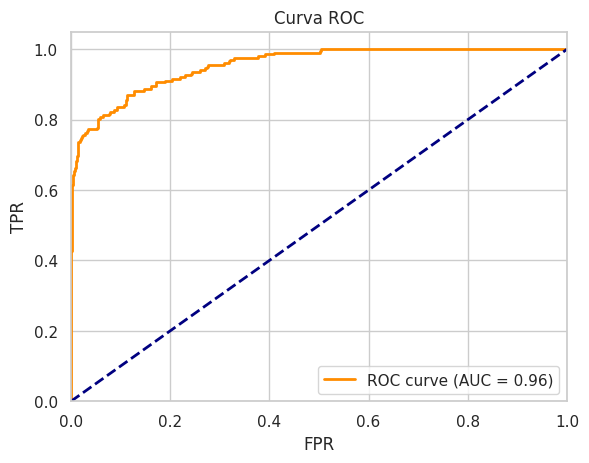

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## Conclusiones Principales

### Factores Determinantes en la Cancelación de Membresías

- **Frecuencia de uso**: La frecuencia de asistencia tanto total como del mes actual es uno de los indicadores más fuertes para predecir la cancelación. Los clientes que asisten menos de una vez por semana están en mayor riesgo de cancelar.

- **Duración del contrato**: Contratos más cortos (1-3 meses) están correlacionados con una mayor tasa de cancelación, lo que indica que los clientes con compromisos más largos son menos propensos a abandonar.

- **Edad**: Los clientes más jóvenes (promedio de 27 años) son más propensos a cancelar en comparación con clientes mayores.

- **Cargos adicionales**: Los clientes que gastan menos en servicios adicionales como clases privadas o productos de la tienda tienden a cancelar más frecuentemente.

### Modelos Predictivos

- **Regresión Logística**: Se destacó como el modelo más efectivo con una exactitud del **91.6%**. También mostró un buen balance entre precisión y sensibilidad, especialmente para identificar a los clientes que no cancelarán.

- **Bosque Aleatorio (Random Forest)**: Mostró un alto rendimiento con una exactitud del **91%**, pero no superó al modelo de Regresión Logística en cuanto a sensibilidad para la clase de cancelación.

- **Árbol de Decisión** y **SVM**: Tuvieron un rendimiento ligeramente inferior, con exactitudes de **87.6%** y **90.8%**, respectivamente.

---

## Recomendaciones de Retención Basadas en los Hallazgos

### Estrategias para Aumentar la Frecuencia de Visitas

- **Desafíos de asistencia**: Implementar programas que incentiven a los usuarios a asistir al gimnasio más frecuentemente, como desafíos mensuales con recompensas por alcanzar ciertos hitos de asistencia.

- **Programas de lealtad**: Crear un sistema de puntos donde los clientes acumulen recompensas por cada visita o por participar en clases grupales.

### Extensión de Contratos

- **Descuentos por renovación anticipada**: Ofrecer descuentos especiales a clientes que renueven su contrato antes de que este termine, con mayores incentivos para contratos más largos (6 meses o 1 año).

- **Ofertas personalizadas**: Usar campañas de marketing dirigidas a clientes con menos de 2 meses restantes en su contrato para animarlos a extender su membresía.

###  Incentivos para Clientes Jóvenes

- **Promociones “trae a un amigo”**: Los análisis indican que esta estrategia ya tiene un impacto positivo en la retención. Potenciarla entre los clientes más jóvenes podría ayudar a mejorar la retención en este segmento.

- **Eventos sociales y clases especiales**: Introducir actividades atractivas para clientes jóvenes, como clases temáticas o eventos sociales, para fomentar un sentido de comunidad.

### Aumento de Ingresos por Servicios Adicionales

- **Cross-selling de productos y servicios**: Ofrecer promociones en servicios adicionales como sesiones de entrenamiento personal o productos de nutrición deportiva, enfocado en aquellos clientes que no han aprovechado estos servicios anteriormente.

- **Membership tiers**: Crear niveles de membresía con beneficios adicionales (como acceso a áreas exclusivas o descuentos en servicios) para fomentar un mayor gasto y compromiso.

### Atención Personalizada para Clientes en Riesgo

- **Intervenciones proactivas**: Contactar a los clientes que muestran signos de baja asistencia para ofrecerles incentivos personalizados, como descuentos temporales o sesiones gratuitas.

- **Notificaciones y recordatorios**: Implementar un sistema de notificaciones para motivar a los clientes inactivos a regresar, recordándoles los beneficios de mantenerse activos.
